## Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator). Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. In this project, we will analyze the recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

### Introduction

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. We have ready-made data for both these periods of time:

- Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We will use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.
- Another user collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we will use it to analyze the rating system's characteristics after Hickey's analysis.

### First step: Reading both datasets and extracting features

In [5]:
# Reading datasets
import pandas as pd

old_fandango = pd.read_csv('fandango_score_comparison.csv')
new_fandango = pd.read_csv('movie_ratings_16_17.csv')
print(old_fandango.columns, old_fandango.info(), sep='\n')
print(new_fandango.columns, new_fandango.info(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [6]:
# Isolating interesting data for our analysis
old_fandango_processed = old_fandango.loc[:, ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
new_fandango_processed = new_fandango.loc[:, ['movie', 'year', 'fandango']].copy()
print(old_fandango_processed.columns, old_fandango_processed.info(), sep='\n')
print(new_fandango_processed.columns, new_fandango_processed.info(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB
Index(['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
       'Fandango_Difference'],
      dtype='object')
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
movie       214 non-null object
year        214 non-null int64
fandango    214 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB
Index(['movie', 'year', 'fandango'], dtype='object')
None


By observing both datasets, the two of them refer to movies with a significant number of votes (+30) so we can infer the conclusions of this analysis for the most popular movies in the years 2015, 2016 and 2017. Thus, the results can not be transfered to the rest of the movies of that years.

### Second step: Reordering of the goals

We have seen that the sampling performed to extract the original data was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It is questionable whether this sample is representative of the entire population we are interested to describe. It seems more likely that it is not, mostly because this sample is subject to temporal trends.

Taking this into account, we can change slightly the current goal of our analysis such that:

- The population of interest changes and the samples we currently work with become representative.
- The new goal is still a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

With this information in mind, we decide to find out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

We will use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.


In [10]:
# Checking popular movies for 2015 dataset
if ((old_fandango_processed['Fandango_votes'] < 30).sum()) >= 1:
    print('There are {} movies non popular in 2015 dataset'.format((old_fandango_processed['Fandango_votes'] < 30).sum()))
else:
    print('All movies are popular in 2015')

All movies are popular in 2015


Although one of the sampling criteria in our second sample is movie popularity, the sample does not provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

Below we will use a value of 1 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample.

In [11]:
# Checking popular movies for 2016 dataset
new_fandango_processed[new_fandango_processed['year'] == 2016].sample(10, random_state = 1)

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5
134,Pride and Prejudice and Zombies,2016,4.0
40,Deadpool,2016,4.5
115,Money Monster,2016,4.0
204,War Dogs,2016,4.0
111,Miracles from Heaven,2016,4.5


At the time of the analysis, at least 90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

Besides this, we need to clean both of the datasets as some movies were not released in 2015 and 2016.

In [13]:
# Cleaning 2015 dataset
old_fandango_processed['Year'] = old_fandango_processed['FILM'].str[-5:-1]
old_fandango_processed = old_fandango_processed[old_fandango_processed['Year'] == '2015']
print(old_fandango_processed.head(), old_fandango_processed.info(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 145
Data columns (total 6 columns):
FILM                    129 non-null object
Fandango_Stars          129 non-null float64
Fandango_Ratingvalue    129 non-null float64
Fandango_votes          129 non-null int64
Fandango_Difference     129 non-null float64
Year                    129 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 7.1+ KB
                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  Year  
0           14846                  0.5  2015  
1           12640      

In [14]:
# Cleaning 2016 dataset
new_fandango_processed = new_fandango_processed[new_fandango_processed['year'] == 2016]
print(new_fandango_processed.head(), new_fandango_processed.info(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 213
Data columns (total 3 columns):
movie       191 non-null object
year        191 non-null int64
fandango    191 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB
                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
4  A Hologram for the King  2016       3.0
5          A Monster Calls  2016       4.0
None


### Third step: Analyzing the samples

Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

#### Comparison between the shapes of the distributions of movie ratings

Let's start simple with making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

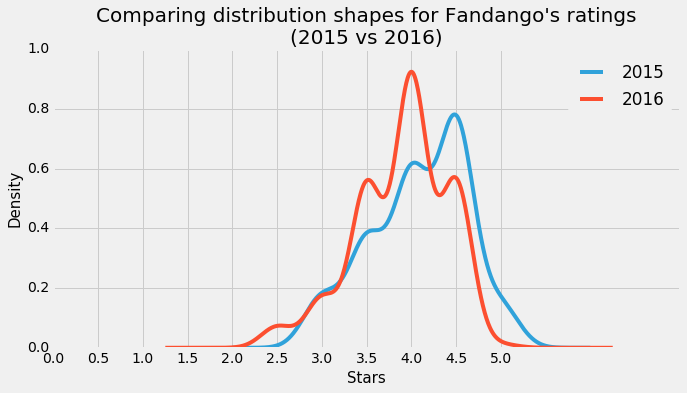

In [30]:
# Generating kernel density plots
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

plt.style.use('fivethirtyeight')
old_fandango_processed['Fandango_Stars'].plot.kde(figsize=(10,5), legend=True, label='2015')
new_fandango_processed['fandango'].plot.kde(figsize=(10,5), legend=True, label='2016')
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)", fontsize=20)
plt.xlabel('Stars', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xticks(arange(0,5.1,.5))
plt.show()

Two aspects are striking on the figure above:

- Both distributions are strongly left skewed.
- The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It would be really interesting to investigate this further — ideally in a separate project, since this is quite irrelevant for the current goal of our analysis.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

#### Examine the frequency distribution tables of the two distributions

In [35]:
# Obtaining frequency tables as percentages
print('2015:', old_fandango_processed['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100, sep='\n')
print('2016:', new_fandango_processed['fandango'].value_counts(normalize = True).sort_index() * 100, sep='\n')

2015:
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64
2016:
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

We will take a couple of summary statistics to get a more precise picture about the direction of the difference. In this case, we will take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

#### Computing mean, median and mode

In [36]:
# Computing mean, median and mode
mean_2015 = old_fandango_processed['Fandango_Stars'].mean()
mean_2016 = new_fandango_processed['fandango'].mean()

median_2015 = old_fandango_processed['Fandango_Stars'].median()
median_2016 = new_fandango_processed['fandango'].median()

mode_2015 = old_fandango_processed['Fandango_Stars'].mode()[0]
mode_2016 = new_fandango_processed['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
print(summary)

            2015      2016
mean    4.085271  3.887435
median  4.000000  4.000000
mode    4.500000  4.000000


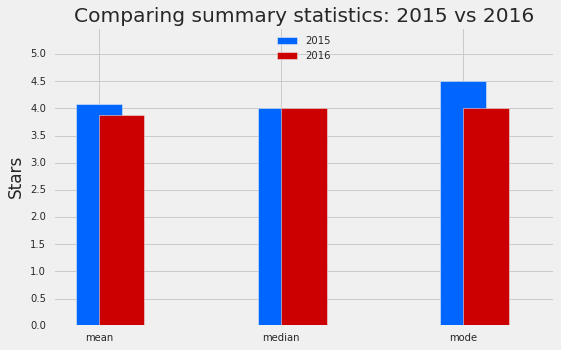

In [43]:
# Visualizing mean, median and mode
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color ='#0066FF', align ='center', label ='2015', width =.25)
summary['2016'].plot.bar(color ='#CC0000', align ='edge', label ='2016', width =.25, rot =0, figsize =(8,5))

plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha=0, loc='upper center')
plt.show()

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

Our analysis has showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.